<a href="https://colab.research.google.com/github/Sanarazaaa/Mental-Disorder-Classification-Using-Random-Forest/blob/main/Mental_Disorder_Classification_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install pandas scikit-learn matplotlib seaborn


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


df = pd.read_excel("/content/Mental disorder symptoms.xlsx")


df = df.dropna().drop_duplicates()


X = df.drop('Disorder', axis=1)
y = df['Disorder']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9130434782608695

Classification Report:
                       precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00         4
                 ASD       1.00      1.00      1.00         3
          Loneliness       1.00      1.00      1.00         1
                 MDD       0.50      0.50      0.50         2
                 OCD       1.00      1.00      1.00         1
                 PDD       0.50      0.50      0.50         2
                PTSD       1.00      1.00      1.00         2
            anexiety       1.00      1.00      1.00         2
             bipolar       1.00      1.00      1.00         1
     eating disorder       1.00      1.00      1.00         2
psychotic deprission       1.00      1.00      1.00         1
   sleeping disorder       1.00      1.00      1.00         2

            accuracy                           0.91        23
           macro avg       0.92      0.92      0.92        23
        weight

In [25]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print("CV mean accuracy:", cv_scores.mean())


CV mean accuracy: 0.9300395256916996


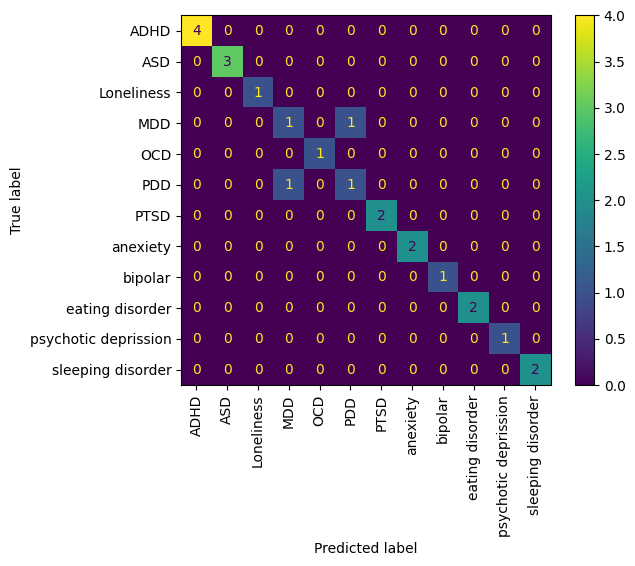

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, xticks_rotation=90)
